# ---------------------------------`Chronic Kidney  Disease `----------------------------------

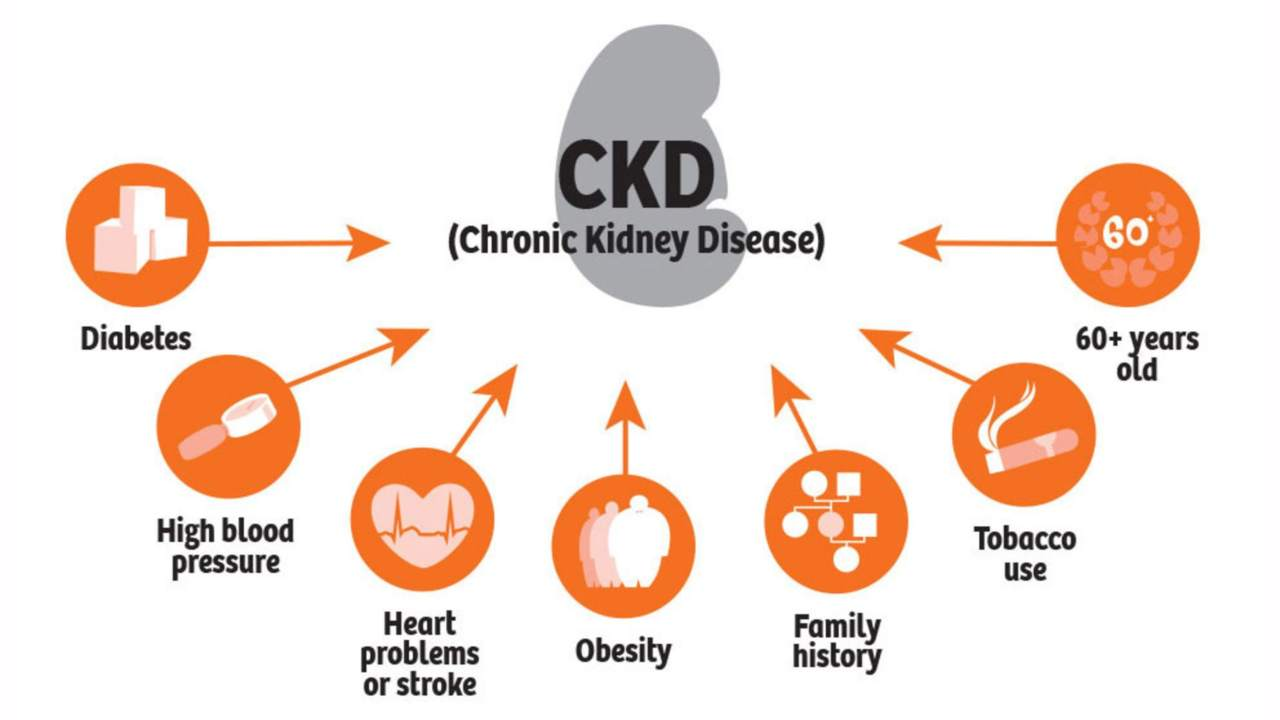

## Data Description ##
Overview, Chronic kidney disease, also called chronic kidney failure, describes the gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then excreted in your urine. When chronic kidney disease reaches an advanced stage, dangerous levels of fluid, electrolytes and wastes can build up in your body.

I got this data from UCI dataset. We have a 400 patients w/ medical records including the labolatory test taken in two montsh period. This has 26 column describe below and 400 rows which are the number of patients.

### Attribute Information: ###

We use 24 + class = 25 ( 11 numeric ,14 nominal) 
1. Age(numerical) 
age in years 
2. Blood Pressure(numerical) 
bp in mm/Hg 
3. Specific Gravity(nominal) 
sg - (1.005,1.010,1.015,1.020,1.025) 
4. Albumin(nominal) 
al - (0,1,2,3,4,5) 
5. Sugar(nominal) 
su - (0,1,2,3,4,5) 
6. Red Blood Cells(nominal) 
rbc - (normal,abnormal) 
7. Pus Cell (nominal) 
pc - (normal,abnormal) 
8. Pus Cell clumps(nominal) 
pcc - (present,notpresent) 
9. Bacteria(nominal) 
ba - (present,notpresent) 
10. Blood Glucose Random(numerical)	
bgr in mgs/dl 
11. Blood Urea(numerical)	
bu in mgs/dl 
12. Serum Creatinine(numerical)	
sc in mgs/dl 
13. Sodium(numerical) 
sod in mEq/L 
14. Potassium(numerical)	
pot in mEq/L 
15. Hemoglobin(numerical) 
hemo in gms 
16. Packed Cell Volume(numerical) 
17. White Blood Cell Count(numerical) 
wc in cells/cumm 
18. Red Blood Cell Count(numerical)	
rc in millions/cmm 
19. Hypertension(nominal)	
htn - (yes,no) 
20. Diabetes Mellitus(nominal)	
dm - (yes,no) 
21. Coronary Artery Disease(nominal) 
cad - (yes,no) 
22. Appetite(nominal)	
appet - (good,poor) 
23. Pedal Edema(nominal) 
pe - (yes,no)	
24. Anemia(nominal) 
ane - (yes,no) 
25. Class (nominal)	
class - (ckd,notckd)




## Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from scipy import stats

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import os
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.


## Explore the data

In [2]:
#Download data to DataFrame
df_kidney=pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Check number of rows and columns
df_kidney.shape

(400, 26)

In [4]:
#Check data type
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [5]:
#Rename long column name to short name
df_kidney.rename(columns={'classification':'classi'}, inplace=True)

In [6]:
# Remove unusaul values
df_kidney=df_kidney.replace(to_replace='?', value=None)
df_kidney=df_kidney.replace(to_replace='\t?', value=None)


In [7]:
#Replace typographical error values
for col in df_kidney.columns:
    if df_kidney[col].dtype == 'object':
        df_kidney[col]=df_kidney[col].str.replace('ckd\t', 'ckd').str.replace('\tno', 'no').str.replace('\tyes','yes')
        df_kidney[col]=df_kidney[col].str.replace('\t43', '43').str.replace(' yes', 'yes')

In [8]:
# remove multiple columns at once for to many NA, predicting variable high correlation to each other 
#and low correlation to target.
#(bgr, su)(sc,bu)(hemo, pcv) remove su, bu, pcv lower correlation to features
#potassium low correlation to feature
df_kidney.drop(['id','rbc','rc', 'wc', 'pcv', 'pot','bu','su','pot','sod', 'al'], axis=1, inplace = True)

In [9]:
#Check the data
df_kidney.head()

,age,bp,sg,pc,pcc,ba,bgr,sc,hemo,htn,dm,cad,appet,pe,ane,classi
0,48.0,80.0,1.020,normal,notpresent,notpresent,121.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,normal,notpresent,notpresent,NaN,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,normal,notpresent,notpresent,423.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,abnormal,present,notpresent,117.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,normal,notpresent,notpresent,106.0,1.4,11.6,no,no,no,good,no,no,ckd


## Dealing with Missing Values
We drop the feature variable w/ more than 100 null values and fill the Null values w/ mean and valid values of the feature variable w/ more than 350 non_null value to retain above 350 data points.  

In [10]:
#check null values in rows
df_kidney[df_kidney.columns].isna().sum(axis=1).head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

In [11]:
#Keep only the rows with at least  non-na values:
df_kidney = df_kidney.dropna(thresh=14)

In [12]:
#Check null values in rows
df_kidney[df_kidney.columns].isna().sum(axis=1).head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

In [13]:
df_kidney.dtypes

age       float64
bp        float64
sg        float64
pc         object
pcc        object
ba         object
bgr       float64
sc        float64
hemo      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
classi     object
dtype: object

In [14]:
#Check the datatype object unique number of values
categorical = df_kidney.select_dtypes(include='object')
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

pc
2
pcc
2
ba
2
htn
2
dm
2
cad
2
appet
2
pe
2
ane
2
classi
2


In [15]:
#Check the number of null values
df_kidney.isna().sum()

age        6
bp         6
sg        28
pc        42
pcc        1
ba         1
bgr       34
sc        11
hemo      34
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
classi     0
dtype: int64

In [16]:
# fill in missing values with mean & appropriate value
df_kidney['age'].fillna(value= 51, inplace=True)
df_kidney['bp'].fillna(value= 76, inplace=True)
df_kidney['sg'].fillna(value= 1.2, inplace=True)
df_kidney['pc'].fillna(value= 'normal', inplace=True)
df_kidney['pcc'].fillna(value= 'present', inplace=True)
df_kidney['ba'].fillna(value= 'notpresent', inplace=True)
df_kidney['bgr'].fillna(value= 146, inplace=True)
df_kidney['sc'].fillna(value= 1 , inplace=True)
df_kidney['hemo'].fillna(value= 12 , inplace=True)
df_kidney['htn'].fillna(value= 'no', inplace=True)
df_kidney['dm'].fillna(value= 'no', inplace=True)
df_kidney['cad'].fillna(value= 'no', inplace=True)
df_kidney['appet'].fillna(value= 'good', inplace=True)
df_kidney['pe'].fillna(value= 'no', inplace=True)
df_kidney['ane'].fillna(value= 'no', inplace=True)


In [17]:
#Check null values 
df_kidney.isna().sum()

age       0
bp        0
sg        0
pc        0
pcc       0
ba        0
bgr       0
sc        0
hemo      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
classi    0
dtype: int64

In [18]:
#Check the types of each column
df_kidney.dtypes

age       float64
bp        float64
sg        float64
pc         object
pcc        object
ba         object
bgr       float64
sc        float64
hemo      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
classi     object
dtype: object

In [19]:
#Reset it index to start to zero
df_kidney = df_kidney.reset_index(drop=True)

In [20]:
# Categorize the data
df_kdny_cat = pd.get_dummies(df_kidney)
df_kdny_cat.head()

,age,bp,sg,bgr,sc,hemo,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classi_ckd,classi_notckd
0,48.0,80.0,1.020,121.0,1.2,15.4,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,146.0,0.8,11.3,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,423.0,1.8,9.6,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0
3,48.0,70.0,1.005,117.0,3.8,11.2,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
4,51.0,80.0,1.010,106.0,1.4,11.6,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [21]:
#Drop some repeated column
df_kdny_cat.drop(['pc_abnormal',   'pcc_present',
        'ba_present', 'htn_no',  'dm_no', 
        'cad_yes',  'appet_poor', 'pe_yes',
        'ane_yes',  'classi_notckd'], 1, inplace=True)

In [22]:
df_kdny_cat.shape

(368, 16)

In [23]:
#Cleaning some outliers
#df_kdny_cat = df_kdny_cat[df_kdny_cat['bu']<250]
df_kdny_cat = df_kdny_cat[df_kdny_cat['sc']<20]
df_kdny_cat = df_kdny_cat[df_kdny_cat['hemo']>5]

In [24]:
#Check classification label division
df_kdny_cat['classi_ckd'].value_counts()

1    221
0    143
Name: classi_ckd, dtype: int64

In [25]:
#Check the number of rows and columns
df_kdny_cat.shape

(364, 16)

In [26]:
#Check the data statistically
df_kdny_cat.describe()

,age,bp,sg,bgr,sc,hemo,pc_normal,pcc_notpresent,ba_notpresent,htn_yes,dm_yes,cad_no,appet_good,pe_no,ane_no,classi_ckd
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,51.368132,76.390110,1.031525,148.423077,2.464698,12.550824,0.804945,0.884615,0.939560,0.359890,0.335165,0.909341,0.796703,0.815934,0.862637,0.607143
std,16.882242,13.692068,0.049012,75.654733,3.069592,2.677871,0.396788,0.319925,0.238627,0.480629,0.472698,0.287519,0.403005,0.388071,0.344704,0.489058
min,3.000000,50.000000,1.005000,22.000000,0.400000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,101.750000,0.900000,10.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,54.000000,80.000000,1.020000,125.000000,1.200000,12.200000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.000000,80.000000,1.025000,153.000000,2.625000,14.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.200000,490.000000,18.100000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

## Heat Map 

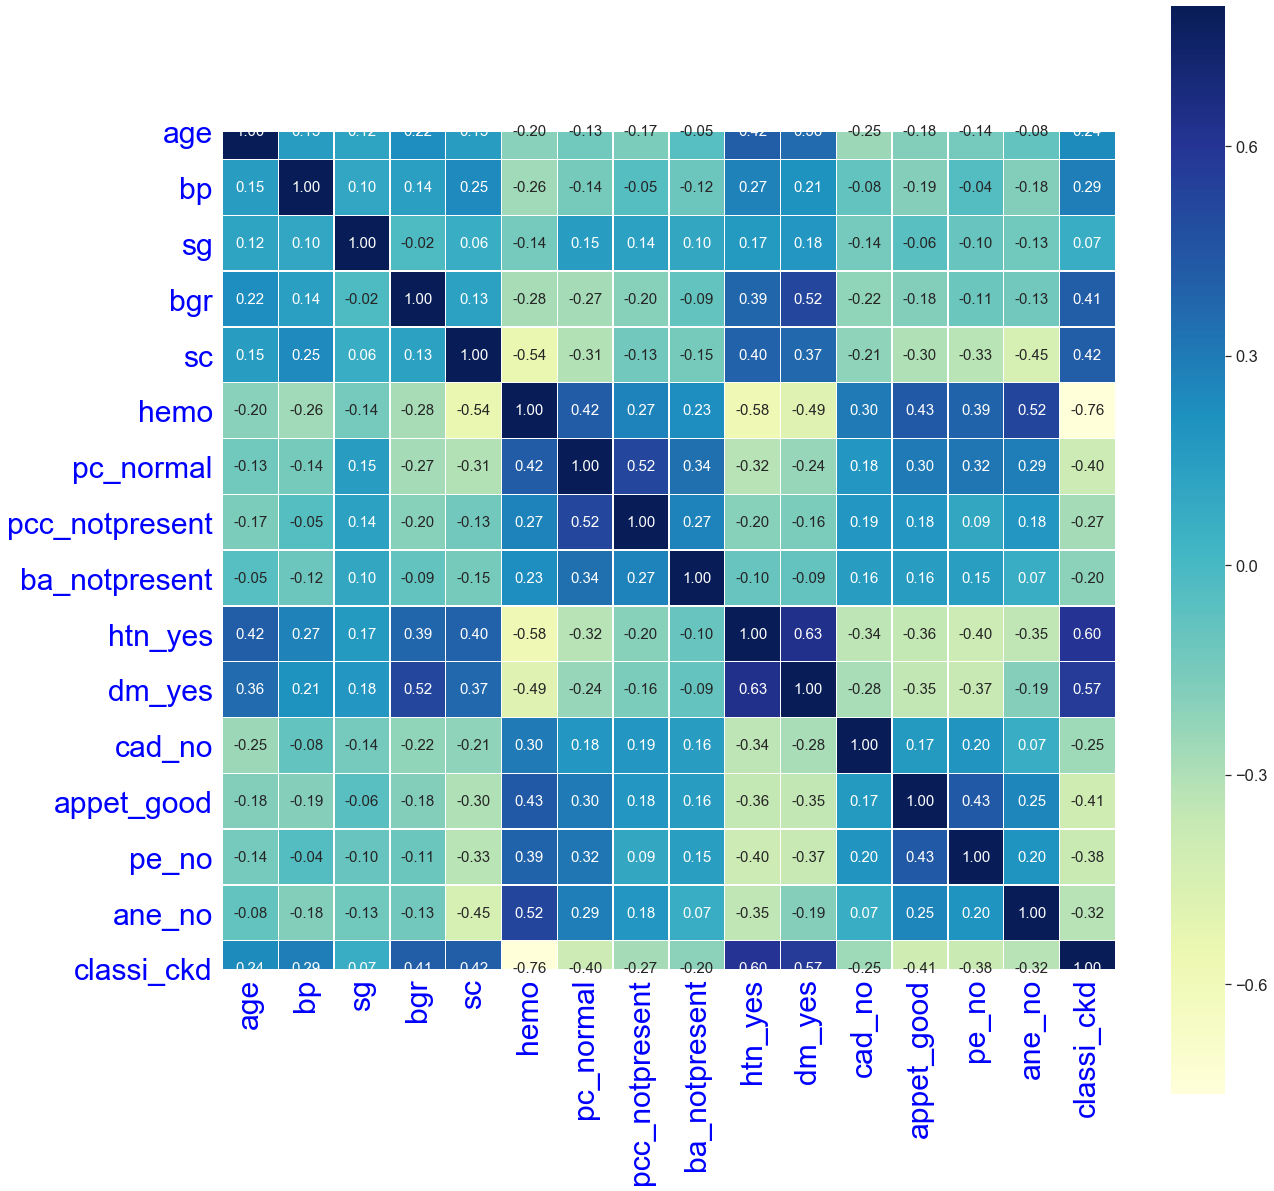

In [27]:
# Creating a correlation matrix
import matplotlib.pylab as pylab
fig = plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)
healthmat = df_kdny_cat.corr()
sns.heatmap(healthmat, vmax = .8, square = True, annot=True, cmap="YlGnBu", linewidths=.5, fmt='.2f',
                 annot_kws={'size':15},  cbar=True)


plt.xticks(size = 30, color='blue' )
plt.yticks(size = 30, color='blue')


plt.show()

#### In this heat map we measure the correlation between features variables and target variables. Prediction variable are highly correlated are Hemoglobin & PCV(Pack Cell Volume), Sugar & BGR, SC & BU. In the correlated variable I remove the variable that is least corrrelated to the target variable. I remove also Potassium because it has very low correlation to the target variable.

## Histogram of continuous variable

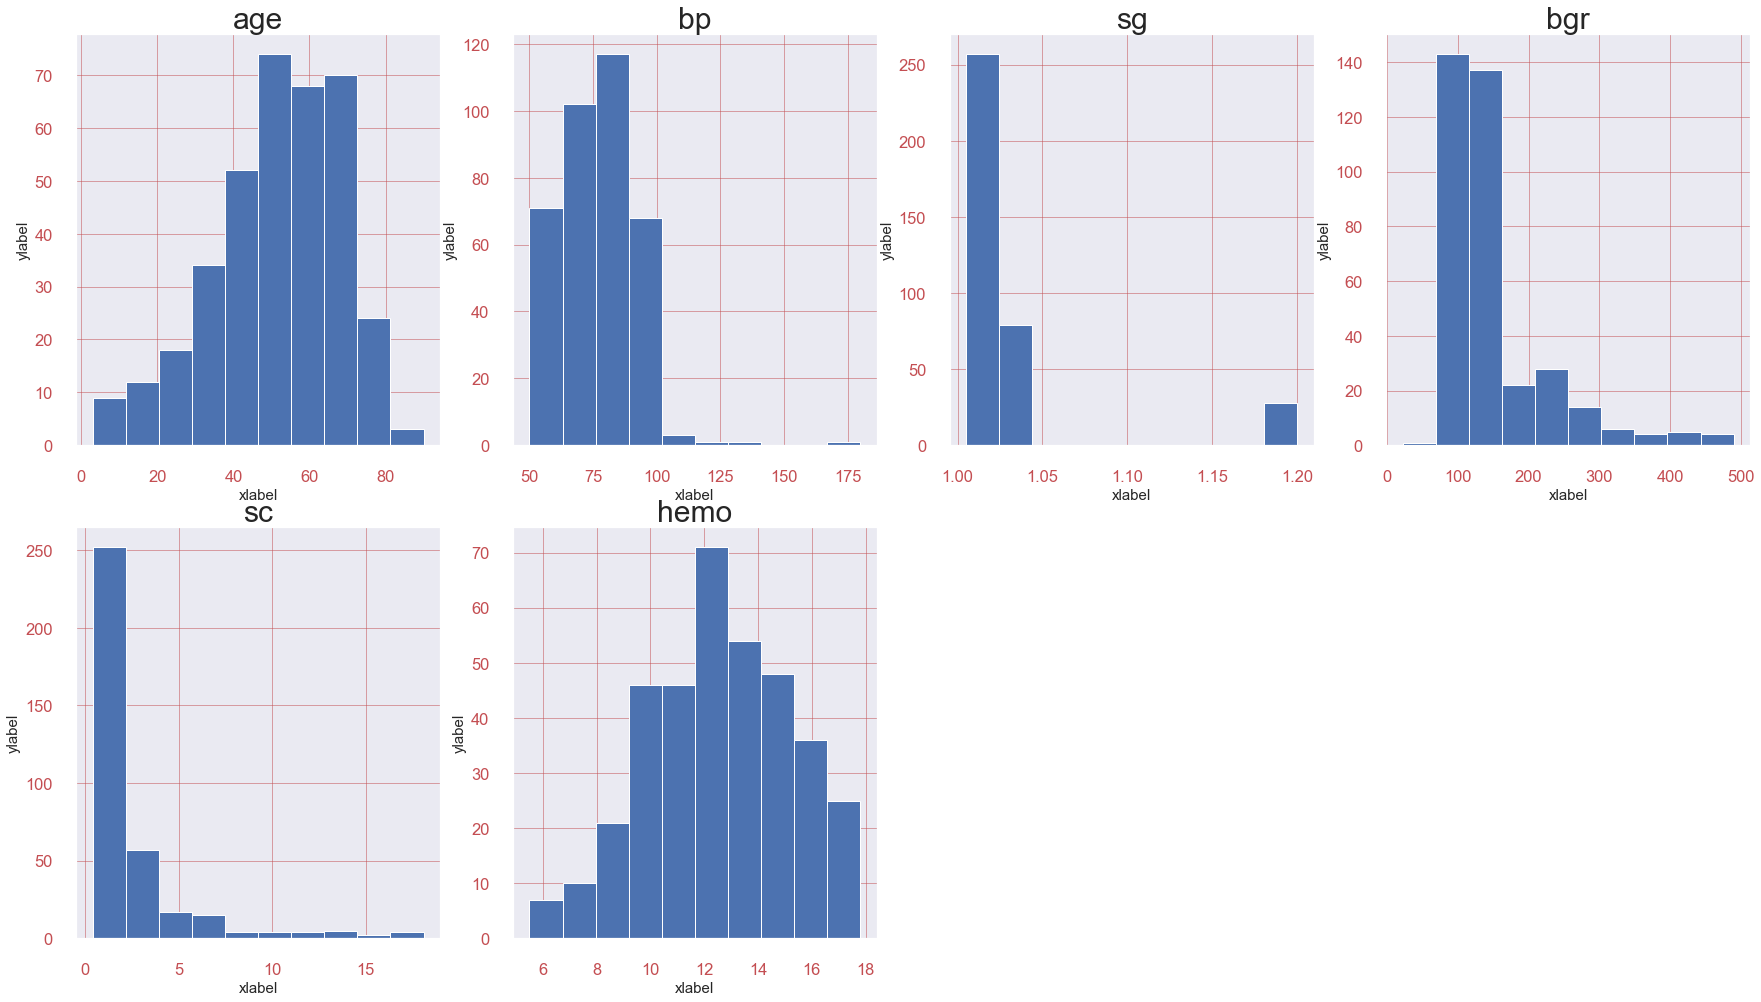

In [28]:
# Create a dictionary of columns.
dic_col = {'age':1, 'bp':2, 'sg':3, 'bgr':4, 'sc':5, 'hemo':6}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    plt.hist(df_kdny_cat[variable])
  
    plt.xlabel('xlabel', fontsize=15)
    plt.ylabel('ylabel', fontsize=15)
    plt.tick_params(direction='out', length=20, width=20, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.title(variable, size = 30)
    plt.subplots_adjust(top=1)

#### The histogram determine the distrubution of the data, In the graph above it shows only that age and hemo test look like they are normally  distributed. The means are 50 and 12 respectively. The other test are not normally distributed.

## Box plot all continuous variable

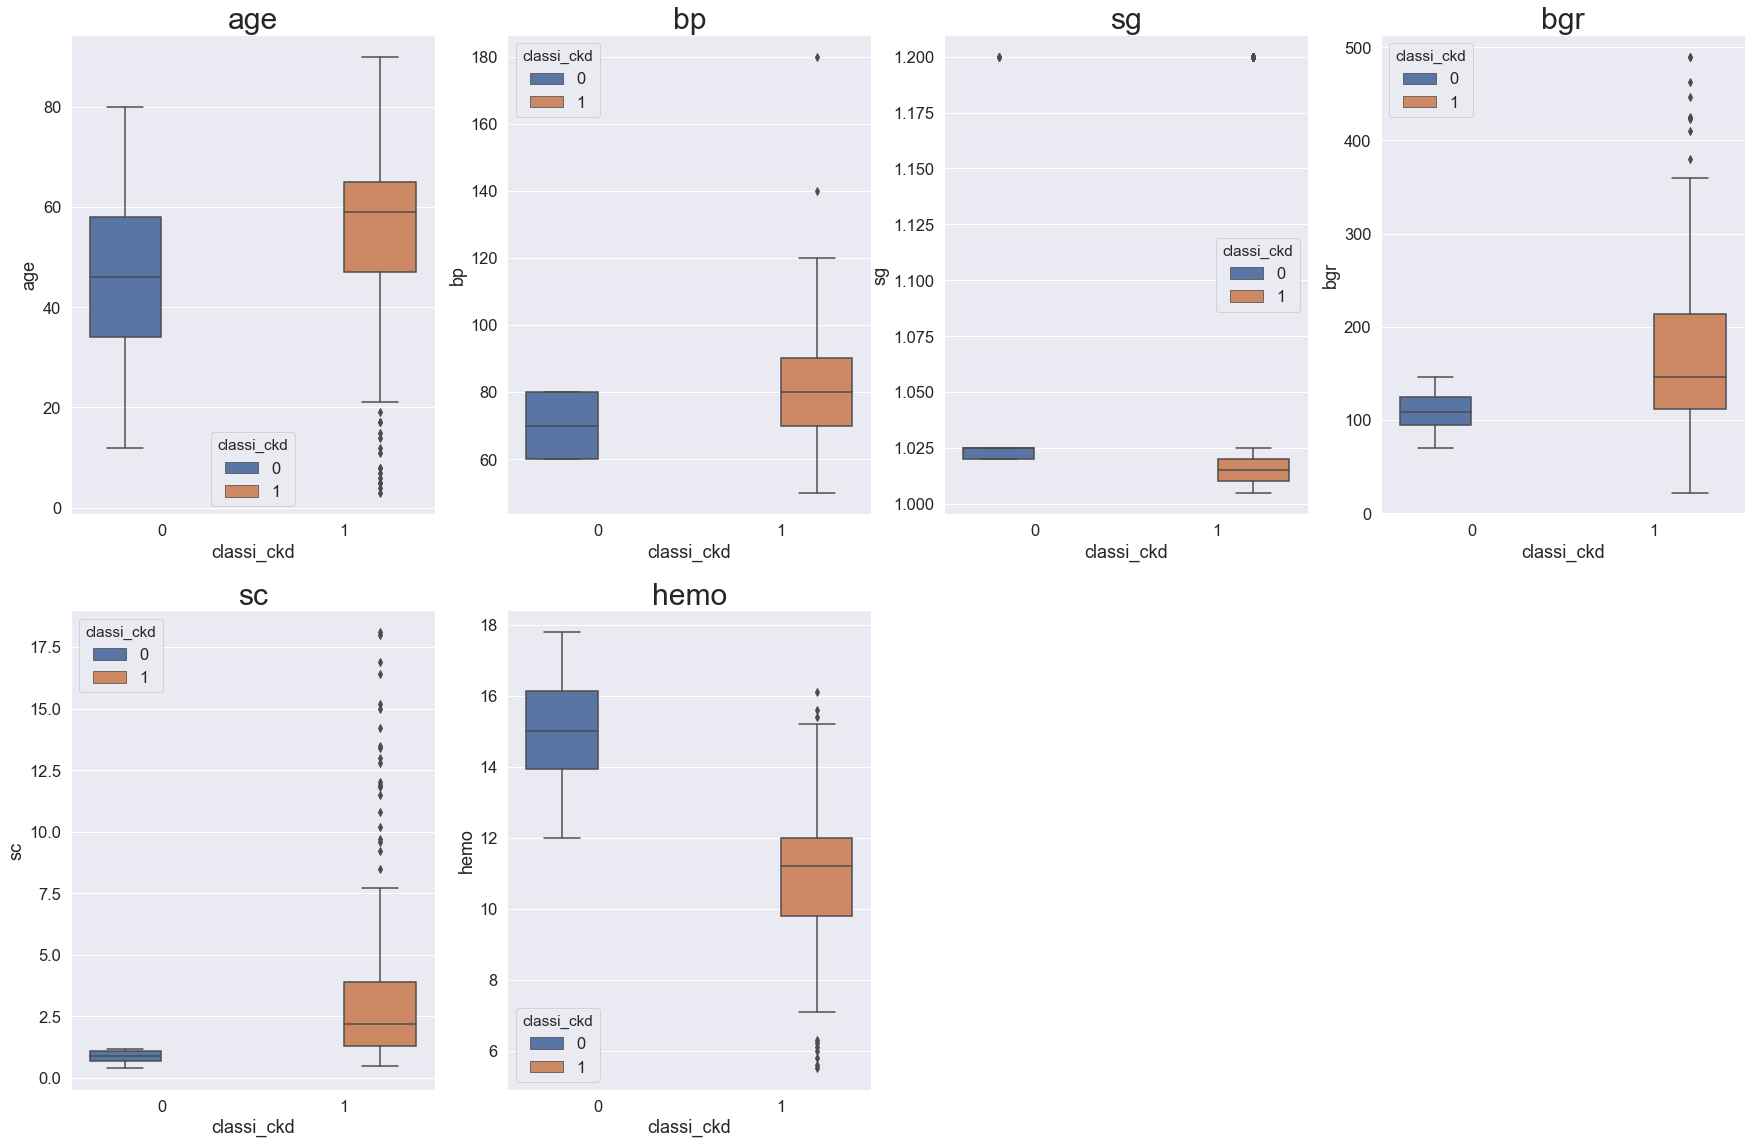

In [29]:
# Create a dictionary of columns.
#dic_col = {'age':1, 'bp':2, 'sg':3, 'al':4, 'bgr':5, 'sc':6, 'hemo':7}
dic_col = {'age':1, 'bp':2, 'sg':3, 'bgr':4, 'sc':5, 'hemo':6}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(3,4,i)
    
    sns.boxplot(x='classi_ckd',y=df_kdny_cat[variable],hue='classi_ckd',data=df_kdny_cat)
    plt.title(variable, size=30)

#### In the boxplot shown above it shows that there outliers in each lab test but we should be carefull when winsoring the outliers cause there is a normal range and abnormal range of laboratory test. The outliers are mostly abnormal range and we can not winsorize or put them to max or min cause we might put them to normal range. This will effect hugely the prediction outcome. What I did here is I remove the garbage outliers that have no sense on the data and pick model algorithm that is not sensitive to outliers. For example is the Random Forest and Decision Tree.

## Seaborn kdeplot

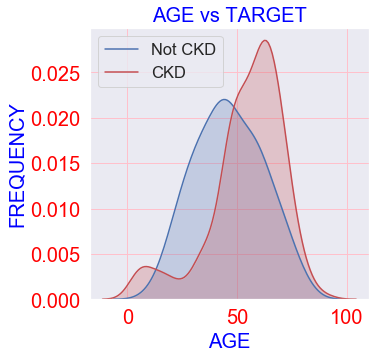

In [30]:
fig = plt.figure(figsize=(5,5))
ax=sns.kdeplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'age'] , color='b',shade=True, label='Not CKD')
ax=sns.kdeplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'age'] , color='r',shade=True, label='CKD')
#ax.set(xlabel='AGE', ylabel='Frequency')
plt.title('AGE vs TARGET', size=20, color='Blue' )

plt.xlabel('AGE', size = 20, color='blue')
plt.ylabel('FREQUENCY', size = 20, color='blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### The orange graph shows is the kidney disease, the mean age with kidney disease is 60 years old and the mean for without Kidney disease is about 40 yrs old. This shows that older people are more prone to kidney disease.

## Histogram between Hemoglobin test and target variable

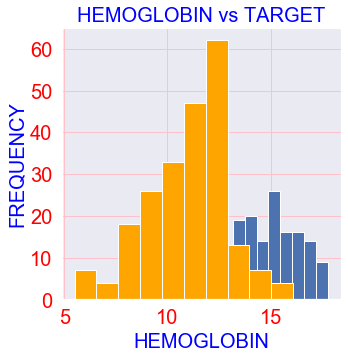

In [31]:
#Histogram of target and hemoglobin pertaining to the hemoglobin normal range(12 - 17.5)
fig = plt.figure(figsize=(5,5))
plt.hist(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'hemo'] ,  color='b', label='Not CKD')
plt.hist(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'hemo'] ,  color='orange', label='CKD')
plt.title('HEMOGLOBIN vs TARGET', size=20, color='Blue' )

plt.xlabel('HEMOGLOBIN', size = 20, color='blue')
plt.ylabel('FREQUENCY', size = 20, color='blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### The orange graph show is with kidney disease, most of those who has abnormal hemoglobin mostly below 12 g/dL has Kidney disease and the blue shows they are in the range of normal hemoglobin lab test(12-17.5g/dL) mostly don't have kidney disease.

## Boxplot of Blood Glucose Random(BGR) and arget variable

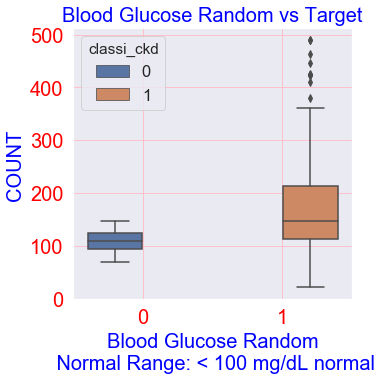

In [32]:
fig = plt.figure(figsize=(5,5))
ax = sns.boxplot(x='classi_ckd',y='bgr',hue='classi_ckd',data=df_kdny_cat)  
plt.title('Blood Glucose Random vs Target', size=20, color='Blue')

plt.ylabel('COUNT ', size = 20, color='Blue')
plt.xlabel('Blood Glucose Random\n Normal Range: < 100 mg/dL normal', size = 20, color='blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### Shown in the boxplot is the blood glucose random laboratory test, the normal shown is less than 100 mg/dL. We can see here that the blue one without kidney disease are mostly w/in the 100 range normal blood glucose test. The orange boxplot has kidney disease has abnormal blood glucose concentrated mostly above 160 and which is abnormal range.

## Countplot between the Diabetic and target variable

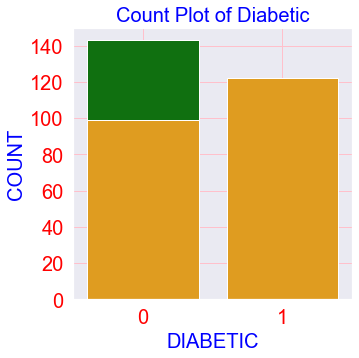

In [33]:
fig = plt.figure(figsize=(5,5))
ax=sns.countplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 0),'dm_yes'] , color='green', label='Not CKD')
ax=sns.countplot(df_kdny_cat.loc[(df_kdny_cat['classi_ckd'] == 1),'dm_yes'] , color='orange', label='CKD')
plt.title('Count Plot of Diabetic', size=20, color='Blue' )

plt.xlabel('DIABETIC', size = 20, color='Blue')
plt.ylabel('COUNT', size = 20, color='Blue' )

plt.xticks(size = 20, color='red' )
plt.yticks(size = 20, color='red')
plt.grid(True, color='pink')
plt.show()

#### Shown in the countplot is 100% of those patient that are diabetic has kidney disease(orange) and most patient that are NOT diabetic(green) does not have kidney disease and also there are patient that are NOT diabetic but have kidney disease.



## Pie chart of target variable

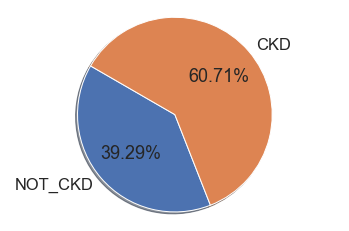

In [34]:
# Creates a pie chart that represents the target categories in our dataset

plt.pie(np.bincount(df_kdny_cat['classi_ckd']), labels=['NOT_CKD', 'CKD'],
        autopct='%3.2f%%', shadow=True, startangle=150)
plt.axis('equal')


plt.xticks(size = 20, color='violet' )
plt.yticks(size = 20, color='violet')

plt.show()

#### This visualization  shows the division of the labeled Target variable. The Kidney disease is 60% and NOT kidney disease is almost 40%. They are almost the same so there is no need to resample and balance them to make them equal.


# Model Selections and Results

## Logistic Regression

In [35]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)#1e9, 1e30
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

#Feature Scaling, normalize the values coz some number are very high or low
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
lr_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, lr_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, lr_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, lr_pred)))
print()
print(confusion_matrix(y_test, lr_pred))

accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)


Coefficients
[[  -4.89354685    9.2993048  -129.59664568   19.9927127    18.0994256
   -18.20505792    0.91593989   -2.98254371    1.78983497  121.58006112
   201.15921079   14.18638832  -76.78088742  -67.56725548   -6.92390212]]
[266.09935344]

Accuracy is 0.97
Precision is 0.98
Recall is 0.98

[[53  2]
 [ 2 89]]


In [36]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(lr, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(lr, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.97727273 0.97727273 0.88636364 0.97674419 0.86046512]
MEAN ACCURACY:  0.9356236786469344


## Decision Tree

In [37]:
#Import Decision Tree
#Splitting the dataset into Training set and Test set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

dtree =  DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)

print(classification_report(y_test, dtree_pred))
print(confusion_matrix(y_test, dtree_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)



              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.99      0.96      0.97        97

    accuracy                           0.97       146
   macro avg       0.96      0.97      0.96       146
weighted avg       0.97      0.97      0.97       146

[[48  1]
 [ 4 93]]

Accuracy is 0.97
Precision is 0.99
Recall is 0.96


In [38]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(dtree, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(dtree, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.97727273 0.84090909 0.95454545 0.95454545 0.88095238]
MEAN ACCURACY:  0.9218614718614718


## Random Forest

In [39]:
#Test w/o balancing the class
from sklearn.ensemble import RandomForestClassifier
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rfc_pred )))
print("Precision is {0:.2f}".format(precision_score(y_test, rfc_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, rfc_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, rfc_pred))

accuracy_rfc = accuracy_score(y_test, rfc_pred)
precision_rfc = precision_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)


Accuracy is 1.00
Precision is 1.00
Recall is 1.00

Confusion Matrix: 
 [[49  0]
 [ 0 97]]


In [40]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(rfc, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(rfc, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.97727273 1.         0.97727273 1.         0.97619048]
MEAN ACCURACY:  0.9722943722943723


## KNN

In [41]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


#Feature Scaling, normalize the values coz some number are very high or low 5
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting K-NN to training dataset 6
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p=2)
knn_cls.fit(X_train, y_train)

#Predicting the Test set results 7
knn_pred = knn_cls.predict(X_test)

#Evaluating the Model by creating confusion matrix 8
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, knn_pred)
#print(cm)
print()
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, knn_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, knn_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, knn_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))

accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)




Accuracy is 0.91
Precision is 1.00
Recall is 0.87

Confusion Matrix: 
 [[49  0]
 [13 84]]


In [42]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(knn_cls, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(knn_cls, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.88636364 0.95454545 0.84090909 0.95454545 0.9047619 ]
MEAN ACCURACY:  0.9082251082251082


## Naive Bayes

In [43]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
bnb_pred = bnb.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, bnb_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, bnb_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, bnb_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, bnb_pred))

accuracy_NB = accuracy_score(y_test, bnb_pred)
precision_NB= precision_score(y_test, bnb_pred)
recall_NB = recall_score(y_test,bnb_pred)



Accuracy is 0.92
Precision is 1.00
Recall is 0.89

Confusion Matrix: 
 [[49  0]
 [11 86]]


In [44]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(bnb, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(bnb, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.88636364 0.95454545 0.90909091 0.93181818 0.9047619 ]
MEAN ACCURACY:  0.9173160173160173


## SVM_Classifier

In [45]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


#Feature Scaling, normalize the values coz some number are very high or low and we are dealing w/ distance
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

#Predicting the Test set results 
svc_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, svc_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, svc_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, svc_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, svc_pred))

accuracy_SVM = accuracy_score(y_test, svc_pred)
precision_SVM = precision_score(y_test, svc_pred)
recall_SVM = recall_score(y_test, svc_pred)




Accuracy is 0.97
Precision is 1.00
Recall is 0.95

Confusion Matrix: 
 [[49  0]
 [ 5 92]]


In [46]:
# Checking the accuracy of our model using cross validation and to check for overfitting
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ',cross_val_score(svc, X_train, y_train, cv=5))
print('MEAN ACCURACY: ',cross_val_score(svc, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.93181818 1.         0.97727273 1.         0.92857143]
MEAN ACCURACY:  0.9675324675324676


## Gradient Boosting

In [47]:
#Splitting the dataset into Training set and Test set 4
X = df_kdny_cat.iloc[:,:-1]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb_clf = ensemble.GradientBoostingClassifier(**params)
gb_clf.fit(X_train, y_train)

predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))
print()

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, predict_test )))
print("Precision is {0:.2f}".format(precision_score(y_test, predict_test)))
print("Recall is {0:.2f}".format(recall_score(y_test, predict_test)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, predict_test))

accuracy_GB = accuracy_score(y_test, predict_test)
precision_GB = precision_score(y_test, predict_test)
recall_GB = recall_score(y_test, predict_test)


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.02054794520547945

Accuracy is 0.98
Precision is 1.00
Recall is 0.97

Confusion Matrix: 
 [[49  0]
 [ 3 94]]


In [48]:
# Checking the accuracy of our model using cross validation and to check for overfitting
# If the value of 
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION: ', cross_val_score(gb_clf, X_train, y_train, cv=5))
print('MEAN ACCURACY: ', cross_val_score(gb_clf, X_train, y_train, cv=5).mean())

CROSS VALIDATION:  [0.97727273 0.97727273 0.95454545 0.97727273 0.97619048]
MEAN ACCURACY:  0.9725108225108225


## Choosing parameters with GridSearchCV with 10-fold cross validations.


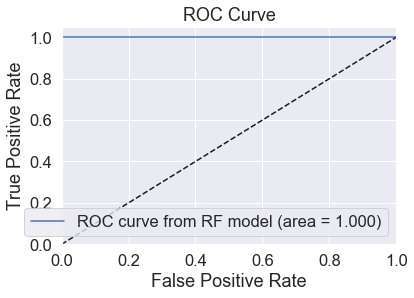

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00699301, 0.02097902, 0.11888112, 1.        ]),
 array([0.        , 0.83710407, 0.93665158, 0.97285068, 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 1.0)

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

auc_scorer(rfc,X,y,'RF')

Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.97      0.98        97

    accuracy                           0.98       146
   macro avg       0.97      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146

Confusion Matrix:
[[49  0]
 [ 3 94]]


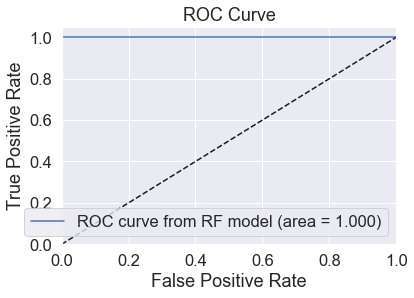

Best parameters:
{'class_weight': None, 'max_depth': 3, 'n_estimators': 14, 'random_state': 20}


In [50]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[20]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, rfc_pred  = y_test, clf.predict(X_test) #rfc_pred lr_pred
print(classification_report(y_true, rfc_pred))

confusion = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        49
           1       1.00      0.97      0.98        97

    accuracy                           0.98       146
   macro avg       0.97      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146

Confusion Matrix:
[[49  0]
 [ 3 94]]


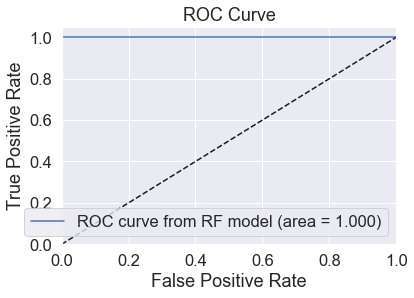

Best parameters:
{'class_weight': None, 'max_depth': 3, 'n_estimators': 14, 'random_state': 20}


In [51]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[20]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred  = y_test, clf.predict(X_test) #rfc_pred lr_pred
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


## Examine feature importance using the best parameters
Best parameters:
{'class_weight': None, 'max_depth': 3, 'n_estimators': 14, 'random_state': 20}

 1) hemo                           0.274750
 2) sg                             0.227442
 3) htn_yes                        0.131325
 4) dm_yes                         0.090274
 5) appet_good                     0.083803
 6) bgr                            0.061672
 7) bp                             0.055400
 8) pc_normal                      0.018239
 9) ane_no                         0.018145
10) pe_no                          0.014830
11) sc                             0.012756
12) age                            0.011364
13) cad_no                         0.000000
14) ba_notpresent                  0.000000
15) pcc_notpresent                 0.000000


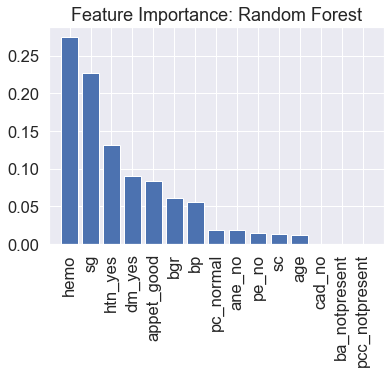

In [53]:

forest = RandomForestClassifier(criterion='gini',
                                max_depth=3,
                                n_estimators=14,
                                random_state=20)
feat_labels = df_kdny_cat.columns[:-1]
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Random Forest')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show() 

## Test the 5 most important predictor variable using Random Forest Model

In [54]:
#Using the 5 best predictor
from sklearn.ensemble import RandomForestClassifier
X = df_kdny_cat[['sg', 'sc', 'hemo', 'htn_yes', 'appet_good']]
y = df_kdny_cat['classi_ckd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)


rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print()
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rfc_pred )))
print("Precision is {0:.2f}".format(precision_score(y_test, rfc_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, rfc_pred)))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, rfc_pred))

accuracy_rfc = accuracy_score(y_test, rfc_pred)
precision_rfc = precision_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)


Accuracy is 0.99
Precision is 1.00
Recall is 0.98

Confusion Matrix: 
 [[49  0]
 [ 2 95]]


## Comparing the all the algorithm and picking the highest accuracy, precision and recall

#### Random Forest
- Accuracy is 0.99
- Precision is 1.00
- Recall is 0.98

#### Gradient boosting
- Accuracy is 0.98
- Precision is 1.00
- Recall is 0.97

#### best five predictor using Random forest
- Accuracy is 0.98
- Precision is 1.00
- Recall is 0.97

#### Random Forest Cross Validation
- CROSS VALIDATION:  [0.95454545, 0.93181818, 0.97727273, 0.97727273, 0.95238095]

## `Conclusion:`

#### Comparing all the model, the result of all ensemble algorithms such as Random forest, Gradient Boosting and the five  best predictor using Random forest has the highest accuracy, precision and recall noted above.  But for me I  pick the Random Forest(RF) for  their ability to limit overfitting without substantially increasing error due to bias and one way Random Forests reduce variance is by training on different samples of the data or from different random trees. All the 5 cross validation values(shown above) of Random Forest are near  each other so this prove that there is no overfitting in the Random Forest. 

#### Because we are predicting diagnosis, we should not base our best model in the accuracy only but also base it on the very low Type 1 Error(False Positive) and Type 2 error(False Negative). Wrong diagnose is very dangerous that is why as much as possible we should minimize the errors. For example, it is not acceptable to diagnose somebody with POSITIVE KIDNEY DISEASE but actually he/she don't have kidney disease or vise versa. Base on the confusion matrix, Random Forest has the lowest error almost no error.